In [10]:
"""
High-dimensional datasets can be overwhelming and leave you not knowing where to start. Typically,
you’d visually explore a new dataset first, but when you have too many dimensions the classical approaches
will seem insufficient. Fortunately, there are visualization techniques designed specifically for high dimensional
data and you’ll be introduced to these in this course. After exploring the data, you’ll often find that many features
hold little information because they don’t show any variance or because they are duplicates of other features. You’ll
learn how to detect these features and drop them from the dataset so that you can focus on the informative ones. In a
next step, you might want to build a model on these features, and it may turn out that some don’t have any effect on
the thing you’re trying to predict. You’ll learn how to detect and drop these irrelevant features too, in order to
reduce dimensionality and thus complexity. Finally, you’ll learn how feature extraction techniques can reduce
dimensionality for you through the calculation of uncorrelated principal components.
"""

"""
Before engaging dimensionality reduction, make sure we only have the volume of columns we need, that they are
tidy and clean, and that the data is tidy as much as possible (nan, missing, outliers etc).

The first tool of dimensionality reduction is dataframe.describe() method, allowing us to check which column have very
low variances, that can be dropped.
"""

import os, sys
import pandas as pd
import numpy as np

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data'
os.chdir(path)

pokemon_df = pd.read_csv('pokemon.csv')

print("This dataset is composed of (rows, columns) :", pokemon_df.shape)
print(pokemon_df.describe())
print(pokemon_df.columns)


"""
Removing features without variance
A sample of the Pokemon dataset has been loaded as pokemon_df. To get an idea of which features have little
variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code
to create a smaller, easier to understand, dataset.
"""

# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1', 'Type 2']

print(pokemon_df.columns)


# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

This dataset is composed of (rows, columns) : (800, 13)
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%

In [ ]:
"""
Feature selection : selection columns based on their relevancy (drop()) 
VS 
Feature extraction : build new features using existing ones


Visually detecting redundant features
Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.
Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.
Seaborn has been imported as sns.
"""

import seaborn as sns
import numpy as np
import pandas as pd

os.chdir(path)
ansur_df_1 = pd.read_csv('ANSUR_II_Male.csv')
ansur_df_2 = pd.read_csv('ANSUR_II_Female.csv')

frames = (ansur_df_1, ansur_df_2)

df = pd.concat(frames)
print(df.shape)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()



# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()




# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()



# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()


"""
Advantage of feature selection
What advantage does feature selection have over feature extraction?
The selected features remain unchanged, and are therefore easy to interpret
"""

(6068, 99)


KeyboardInterrupt: 

In [ ]:
"""
t-SNE
t-distributed stochastic neighbor embedding is a statistical method for visualizing high-dimensional data
by giving each datapoint a location in a two or three-dimensional map.


t-SNE intuition is super powerful, but do you know exactly when to use it?
What is a good use case to use t-SNE?
When you want to visually explore the patterns in a high dimensional dataset.

Fitting t-SNE to the ANSUR data
t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, 
you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df 
and fit TSNE to his numeric dataset.
"""

import pandas as pd, numpy as np, seaborn as sns, os, sys
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data/'
os.chdir(path)
df1 = pd.read_csv('ANSUR_II_Male.csv')
df2 = pd.read_csv('ANSUR_II_Female.csv')

length = 1700
selector = np.random.randint(0, length, size = 300)

df1 = df1.iloc[selector]
df2 = df2.iloc[selector]

frames = (df1, df2)
df = pd.concat(frames).head(n=500)
print(df['Gender'].value_counts())


# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)
# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()




# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()



# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

"""
There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being
told about them explicitly! From the second plot you learned there are more males in the Combat Arms Branch.
"""

In [ ]:
"""
About modeling, remember, the more the features, the harder it gets to model (over-fitting, loss of accuracy etc).
But which feature should I drop ?

If we want a model to be able to generalize, which is the goal of modeling, we need to feed him more observations,
but also a selection of the most characteristic features of the phenomenon.

Adding more features often means we need to add more observations into our model (exponentially)
Solution : apply dimensionality reduction to avoid the "curse" (i want more to be more accurate, but then i loose accuracy
because too many features).
"""



"""
Frist thing : check if a model over-fits.
Train - test split
In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset,
you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training
and test set. The training set will be used to train the model and the test set will be used to check its 
performance on unseen data.
"""

# Import train_test_split()
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data/'
os.chdir(path)
df1 = pd.read_csv('ANSUR_II_Male.csv')
df2 = pd.read_csv('ANSUR_II_Female.csv')

length = 1700
selector = np.random.randint(0, length, size = 300)

df1 = df1.iloc[selector]
df2 = df2.iloc[selector]

frames = (df1, df2)
ansur_df = pd.concat(frames).head(n=500)

non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop(non_numeric, axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))




"""
Fitting and testing the model
In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets
have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that
to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.
"""

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

"""
Looks like the model badly overfits on the training data. On unseen data it performs worse than a random selector would.
"""




"""
Accuracy after dimensionality reduction
You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather
drastic form of dimensionality reduction by only selecting a single column that has some good information to
distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare
the accuracy on test vs. training data.
"""

# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))


"""
On the full dataset the model is rubbish but with a single feature we can make good predictions?
This is an example of the curse of dimensionality! The model badly overfits when we feed it too many features.
It overlooks that neck circumference by itself is pretty different for males and females.
"""



Index(['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead'], dtype='object')
headbreadth           37.732341
headcircumference    317.468293
headlength            77.276228
tragiontopofhead      49.439435
dtype: float64


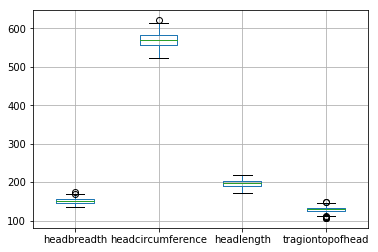

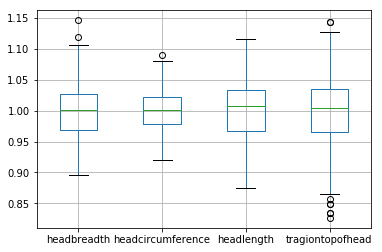

headbreadth          0.001637
headcircumference    0.000978
headlength           0.002021
tragiontopofhead     0.002950
dtype: float64
Dimensionality reduced from 4 to 3.


In [26]:
"""
First : it is very important to normalize values.
Higher values naturally tend to have larger variances = biais & misleading

Then, we need to analyze and correct the impact of missing values on dimensionality reduction

First for instance : find a good variance threshold.
You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.
"""


# Import train_test_split()
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data/'
os.chdir(path)
df1 = pd.read_csv('ANSUR_II_Male.csv')
df2 = pd.read_csv('ANSUR_II_Female.csv')

length = 1700
selector = np.random.randint(0, length, size = 300)

df1 = df1.iloc[selector]
df2 = df2.iloc[selector]

frames = (df1, df2)
ansur_df = pd.concat(frames).head(n=500)

cols = ['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']

head_df = ansur_df[cols]
print(head_df.columns)
print(head_df.var())
# Create the boxplot
head_df.boxplot()

plt.show()




# Normalize the data
normalized_df = head_df / np.mean(head_df)

normalized_df.boxplot()
plt.show()





# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())


"""
Inspect the printed variances. If you want to remove the 2 very low variance features. 
What would be a good variance threshold?
1.0e-03
A threshold of 1.0e-03 (0.001) will remove the two low variance features.

/!\ Attention, not same dataset as exercise, but same idea.

Features with low variance
In the previous exercise you established that 0.001 is a good threshold to filter out low variance features
in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.
"""

from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

In [ ]:
"""
Removing features with many missing values
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df.
Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.
"""

# Import train_test_split()
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data/'
os.chdir(path)
school_df = pd.read_csv('Public_Schools2.csv')

# Create a boolean mask on whether each feature less than 50% missing values.
print(school_df.isna().sum())
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

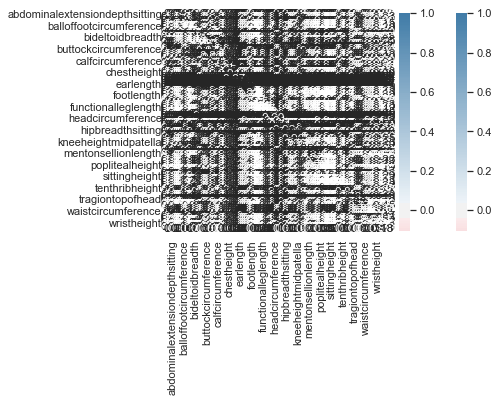

In [54]:
"""
Role of correlation analysis in Dimensionality Reduction
The correlation coefficient of A to B is equal to that of B to A.
This is why you can drop half of the correlation matrix without losing information.

Correlation helps dropping variables that have no correlation at all, and keep those that have propencity to evolve
together.
"""

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir(path)
ansur_df_1 = pd.read_csv('ANSUR_II_Male.csv')
ansur_df_2 = pd.read_csv('ANSUR_II_Female.csv')

frames = (ansur_df_1, ansur_df_2)
ansur_df = pd.concat(frames)

# Create the correlation matrix
corr = ansur_df.corr()
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")



# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")


In [59]:
"""
On the contrary, we can also want to remove highly correlated values.
Removing highly correlated features

Filtering out highly correlated features
You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. 
You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of
more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A)
you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. 
Use a mask trick for this purpose.
"""

# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns, instead of {} initially.".format(reduced_df.shape[1], ansur_df.shape[1]))

The reduced dataframe has 56 columns, instead of 99 initially.


In [ ]:
"""
Nuclear energy and pool drownings
The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers 
for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.
"""

print(weird_df.head(n=5))

# nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

# Print out the correlation matrix of weird_df
print(weird_df.corr())


In [107]:
"""
Selecting features for model performance.
1 way to select the best features is to day their correlations, how they interact between them, detect outliers, NaN etc.
We did that before.

Another way is to analyze how features can effect models. Thats what we're going to do now.
Select & drop features that contribute little to a model performance (standardize their performance coeff, then drop the
lowest ones)
"""



"""
Building a diabetes classifier
You'll be using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression.
There are 8 features and one target in this dataset. The data has been split into a training and test set and pre-loaded 
for you as X_train, y_train, X_test, and y_test.

A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.
"""

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

os.chdir(path)
diabetes_df = pd.read_csv('PimaIndians.csv')

predictors_vars = ['pregnant','glucose','diastolic','triceps','insulin','bmi','family','age']
target_var = ['test']

X = diabetes_df[predictors_vars]
y = diabetes_df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
lr = LogisticRegression()

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


"""
We get almost 80% accuracy on the test set. Take a look at the differences in model coefficients for
the different features.
"""




"""
Now :
Manual Recursive Feature Elimination
Now that we've created a diabetes classifier, let's see if we can reduce the number of features without hurting*
the model accuracy too much.
On the second line of code the features are selected from the original dataframe. Adjust this selection.
A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.
All necessary functions and packages have been pre-loaded too.



First, run the given code, then remove the feature with the lowest model coefficient from X.
"""
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))





"""
# Remove the 2 features with the lowest model coefficients
"""
# Remove the feature with the lowest model coefficient
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))




"""
# Only keep the feature with the highest coefficient
"""
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


"""
Removing all but one feature only reduced the accuracy by a few percent.
"""


"""
Automatic Recursive Feature Elimination
Now let's automate this recursive process. Wrap a Recursive Feature Eliminator (RFE) around our logistic regression
estimator and pass it the desired number of features.
All the necessary functions and packages have been pre-loaded and the features have been scaled for you.
"""

X = diabetes_df[predictors_vars]
y = diabetes_df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated : the lower the better
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

"""
When we eliminate all but the 3 most relevant features we get a 80.6% accuracy on the test set.
"""


76.3% accuracy on test set.
{'pregnant': 0.09, 'glucose': 1.34, 'diastolic': 0.0, 'triceps': 0.14, 'insulin': 0.3, 'bmi': 0.46, 'family': 0.36, 'age': 0.48}
80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}
79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}
76.5% accuracy on test set.
{'glucose': 1.27}
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 1, 'diastolic': 3, 'triceps': 2, 'insulin': 6, 'bmi': 5, 'family': 1, 'age': 4}
Index(['pregnant', 'glucose', 'family'], dtype='object')
80.6% accuracy on test set.


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConver

'\nWhen we eliminate all but the 3 most relevant features we get a 80.6% accuracy on the test set.\n'

In [ ]:
"""
Tree-based feature selection
We can also reduce dimensionality using tree-based methods /algos.
Some models propose feature reduction by-design to avoid over-fitting.
Random Forest Classifier (ensemble method) is one of them.
For this, we can use the RFE method, just changing the estimator the RandomForest classifier instead of a LogisticRegressio
classifier.
Or just use the RF model itself.
"""


"""
Building a random forest model
You'll again work on the Pima Indians dataset to predict whether an individual has diabetes. 
This time using a random forest classifier. You'll fit the model on the training data after performing
the train-test split and consult the feature importance values.
The feature and target datasets have been pre-loaded for you as X and y. Same goes for the necessary packages
and functions.
"""

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the test set accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc)) 


"""
The random forest model gets 78% accuracy on the test set and 'glucose' is the most important feature (0.21).
"""



"""
Random forest for feature selection
Now lets use the fitted random model to select the most important features from our input dataset X.
The trained model from the previous exercise has been pre-loaded for you as rf.
"""

# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

"""
Only the features 'glucose' and 'age' were considered sufficiently important.
"""





"""
Recursive Feature Elimination with random forests
You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. 
This method is more conservative compared to selecting features after applying a single importance threshold.
Since dropping one feature can influence the relative importances of the others.
You'll need these pre-loaded datasets: X, X_train, y_train.
Functions and classes that have been pre-loaded for you are: RandomForestClassifier(), RFE(), train_test_split().
"""

# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)



"""
Compared to the quick and dirty single threshold method from the previous exercise one of the selected features is different.
"""

In [ ]:
"""
Regularized Linear Regression
This is a reminder on how we can reduce dimensionality on continuous variables using regression models or as such.

Lasso : Least absolute shrinkage and selection operator

Creating a LASSO regressor
You'll be working on the numeric ANSUR body measurements dataset to predict a persons Body Mass Index (BMI) using
the pre-imported Lasso() regressor. BMI is a metric derived from body height and weight but those two features have
been removed from the dataset to give the model a challenge.
You'll standardize the data first using the StandardScaler() that has been instantiated for you as scaler to make
sure all coefficients face a comparable regularizing force trying to bring them down.
"""

import seaborn as sns
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data'
os.chdir(path)
ansur_df_1 = pd.read_csv('ANSUR_II_Male.csv')
ansur_df_2 = pd.read_csv('ANSUR_II_Female.csv')

frames = (ansur_df_1, ansur_df_2)
df = pd.concat(frames)

non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']

# Select the Gender column as the feature to be predicted (y)
y = df['BMI']

# Remove the Gender column to create the training data
X = df.drop(non_numeric, axis=1)

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train, y_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)





"""
You've fitted the Lasso model to the standardized training data. Now let's look at the results!
Lasso model results
Now that you've trained the Lasso model, you'll score its predictive capacity () on the test set
and count how many features are ignored because their coefficient is reduced to zero.
The X_test and y_test datasets have been pre-loaded for you.
The Lasso() model and StandardScaler() have been instantiated as la and scaler respectively and both
were fitted to the training data.
"""

# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))




"""
We can predict almost 85% of the variance in the BMI value using just 9 out of 91 of the features. 
The R^2 could be higher though.
Adjusting the regularization strength
Your current Lasso model has an  score of 84.7%. When a model applies overly powerful regularization it
can suffer from high bias, hurting its predictive power.
Let's improve the balance between predictive power and model simplicity by tweaking the alpha parameter.
"""

# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))



"""
With this more appropriate regularization strength we can predict 98% of the variance in the
BMI value while ignoring 2/3 of the features.

Now, notice we arbitrarily chose the alpha value, to avoid this and make the model automatically pick the best value,
we can use a Lasso Cross Validator.

Creating a LassoCV regressor
You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the LassoCV()
regressor that automatically tunes the regularization strength (alpha value) using Cross-Validation.
The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.
"""

from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))



"""
We got a decent R squared and removed 6 features. We'll save the lcv_mask for later on.
"""


"""
Ensemble models for extra votes
The LassoCV() model selected 26 out of 32 features. Not bad, but not a spectacular dimensionality
reduction either. Let's use two more models to select the 10 features they consider most important
using the Recursive Feature Eliminator (RFE).
The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.
"""

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_






from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_



"""
Inluding the Lasso linear model from the previous exercise, we now have the votes from 3 models on
which features are important.


Combining 3 feature selectors
We'll combine the votes of the 3 models you built in the previous exercises, to decide which features are
important into a meta mask. We'll then use this mask to reduce dimensionality and see how a simple linear
regressor performs on the reduced dataset.
The per model votes have been pre-loaded as lcv_mask, rf_mask, and gb_mask and the feature and target datasets
as X and y.
"""




# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))


"""
Using the votes from 3 models you were able to select just 7 features that allowed a simple linear model
to get a high accuracy!
"""

In [1]:
"""
Final Chapter : FEATURE EXTRACTION.

We saw earlier how to choose which features can be removed to optimize our modeling, and which are to be kept.
Now let's see how we can extract, build new features using existing columns, that make original data almost useless.

BMI (body-mass index) is a very good example of feature extraction; the ratio of height over mass can be a way more useful
synthesized feature compared to mass or height taken independently. BMI renders height & mass almost useless.
"""



"""
Manual feature extraction I
You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are:
storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product
were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the
average price per product.
"""

import sys, os
import pandas as pd
import numpy as np


path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data'
os.chdir(path)
sales_df = pd.read_csv('grocery_sales.csv')

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())




# ansur_df_1 = pd.read_csv('ANSUR_II_Male.csv')
# ansur_df_2 = pd.read_csv('ANSUR_II_Female.csv')
# frames = (ansur_df_1, ansur_df_2)
# ansur_df = pd.concat(frames)

# vector = ['height_1','height_2','height_3']

# # Calculate the mean height
# height_df['height'] = height_df[vector].mean(axis=1)

# # Drop the 3 original height features
# reduced_df = height_df.drop(vector, axis=1)
# print(reduced_df.head())




"""
After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors
that are aligned with the main directions of variance. We can describe each point in the dataset as a combination
of these two vectors multiplied with a value each. These values are then called principal components.

Which of the following statements is true?
People with a negative component for the yellow vector have long forearms relative to their upper arms.
"""


"""
Calculating Principal Components on small datasets
You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot().
This will allow you to inspect the pairwise correlations between the features.
"""

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ansur_df_1 = pd.read_csv('ANSUR_II_Male.csv')
ansur_df = pd.read_csv('ANSUR_II_Female.csv')
# frames = (ansur_df_1, ansur_df_2)
# ansur_df = pd.concat(frames)

non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']
working_cls = ['headcircumference', 'buttockheight', 'waistcircumference', 'shouldercircumference']
ansur_df = ansur_df.drop(non_numeric, axis = 1)
ansur_df = ansur_df.loc[:, working_cls]

# Create a pairplot to inspect ansur_df
sns.pairplot(data=ansur_df)
plt.show()



# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(data=pc_df)
plt.show()

"""
Notice how, in contrast to the input features, none of the principal components are correlated to one another.
"""


"""
PCA on larger datasets.
You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df.
The fitted model will be used in the next exercise. Since we are not using the principal components themselves
there is no need to transform the data, instead, it is sufficient to fit pca to the data.
"""

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Enlarge dataset
ansur_df = pd.read_csv('ANSUR_II_Female.csv')

non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']
ansur_df = ansur_df.drop(non_numeric, axis=1)

col_vector = ansur_df.columns
picker = np.random.choice(col_vector, 13)
ansur_df = ansur_df.loc[:, picker]
print(ansur_df.head())

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

"""
You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance.
"""

# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

"""
What's the lowest number of principal components you should keep if you don't want to lose more than 10%
of explained variance during dimensionality reduction?
Using just 7 principal components we can explain more than 90% of the variance in the 13 feature dataset.
"""

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


<Figure size 1000x1000 with 20 Axes>

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<Figure size 1000x1000 with 20 Axes>

   abdominalextensiondepthsitting  buttockpopliteallength  buttockkneelength  \
0                             231                     476                587   
1                             194                     483                583   
2                             183                     466                583   
3                             261                     471                599   
4                             309                     467                607   

   hipbreadthsitting  tragiontopofhead  lateralmalleolusheight  \
0                388               110                      55   
1                335               125                      69   
2                399               129                      64   
3                402               125                      67   
4                499               116                      63   

   tenthribheight  buttockpopliteallength  bicristalbreadth  chestheight  \
0            1013                     476     

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


"\nWhat's the lowest number of principal components you should keep if you don't want to lose more than 10%\nof explained variance during dimensionality reduction?\nUsing just 7 principal components we can explain more than 90% of the variance in the 13 feature dataset.\n"

In [12]:
"""
Understanding the components
You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature
scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).
"""

import pandas as pd
import numpy as np
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data'
poke_df = pd.read_csv('pokemon.csv')

poke_df = poke_df.drop(['Name', 'Type 1','Type 2'], axis = 1)
print(poke_df.head())

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

"""
Inspect the PC 1 effects. Which statement is true?
>>All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).

Inspect the PC 2 effects. Which statement is true?
Defense has a strong positive effect on the second component and speed a strong negative one. 
This component quantifies an agility vs. armor & protection trade-off.

You've used the pipeline for the first time and understand how the features relate to the components.
"""

   #  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0  1    318  45      49       49       65       65     45           1   
1  2    405  60      62       63       80       80     60           1   
2  3    525  80      82       83      100      100     80           1   
3  3    625  80     100      123      122      120     80           1   
4  4    309  39      52       43       60       50     65           1   

   Legendary  
0      False  
1      False  
2      False  
3      False  
4      False  
PC 1 effects = {'#': 0.11, 'Total': 0.49, 'HP': 0.31, 'Attack': 0.36, 'Defense': 0.29, 'Sp. Atk': 0.37, 'Sp. Def': 0.36, 'Speed': 0.28, 'Generation': 0.07, 'Legendary': 0.31}
PC 2 effects = {'#': -0.69, 'Total': 0.07, 'HP': 0.02, 'Attack': 0.04, 'Defense': 0.01, 'Sp. Atk': 0.07, 'Sp. Def': 0.05, 'Speed': 0.11, 'Generation': -0.7, 'Legendary': -0.02}


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


  Type 1  Legendary      PC 1      PC 2
0  Grass      False -2.120722 -1.957188
1  Grass      False -0.736426 -2.140934
2  Grass      False  1.170490 -2.392386
3  Grass      False  2.738437 -2.555566
4   Fire      False -2.325976 -1.981204


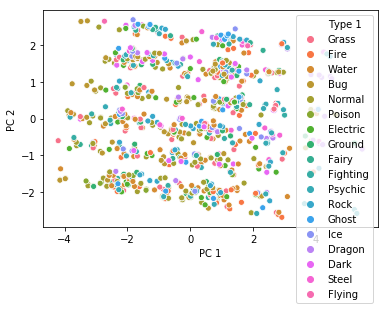

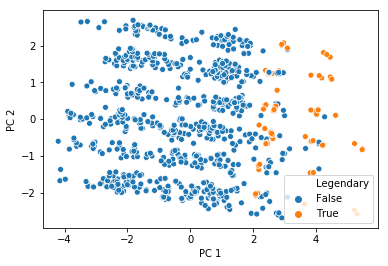

"\nLooks like the different types are scattered all over the place while the legendary Pokemon always score high\nfor PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently\nfast and vulnerable or slow and armored.\n"

In [44]:
"""
PCA for feature exploration
You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features
relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate dataframe
poke_cat_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())
"""

import pandas as pd
import numpy as np
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Dimensionality Reduction in Python/data'
poke_df = pd.read_csv('pokemon.csv')

poke_df = poke_df.drop(['Name', 'Type 1', 'Type 2'], axis = 1)

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)


############################


poke_df = pd.read_csv('pokemon.csv')
poke_df = poke_df.drop(['Name', 'Type 1', 'Type 2', 'Legendary'], axis = 1)

poke2 = pd.read_csv('pokemon.csv')
poke2 = poke2.drop(['Name', 'Type 2'], axis = 1)

sel_col = ['Type 1','Legendary']
poke_cat_df = poke2.loc[:, sel_col]

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]
print(poke_cat_df.head())

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()



"""
Looks like the different types are scattered all over the place while the legendary Pokemon always score high
for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently
fast and vulnerable or slow and armored.
"""

In [54]:
"""
PCA in a model pipeline
We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to 
our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.
Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).
"""

import pandas as pd
import numpy as np
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

poke_df = pd.read_csv('pokemon.csv')
poke_df = poke_df.drop(['Name', 'Type 1', 'Type 2', 'Legendary'], axis = 1)

poke2 = pd.read_csv('pokemon.csv')
poke2 = poke2.drop(['Name', 'Type 2'], axis = 1)
usel_col = ['Legendary']
poke_cat_df = poke2.loc[:, sel_col]

X = poke_df
y = poke_cat_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))


"""
Looks like adding the third component does not increase the model accuracy, even though it adds information to
the dataset.
"""

[0.42165017 0.22072157 0.12025374]
92.0% test set accuracy


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\pipeline.py

'\nLooks like adding the third component does not increase the model accuracy, even though it adds information to\nthe dataset.\n'

11 components selected
23 components selected


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with

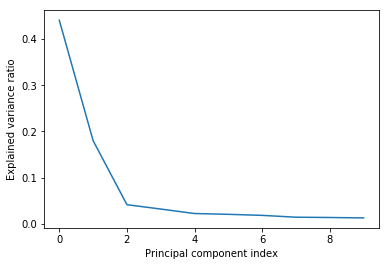

In [63]:
"""
PCA Component Selection.
Selecting the proportion of variance to keep
You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.
You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).
"""

import pandas as pd
import numpy as np
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

ansur_df = pd.read_csv('ANSUR_II_MALE.csv')

exclude = ['Branch','Component','Gender','BMI_class','Height_class']
ansur_df = ansur_df.drop(exclude, axis=1)

# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))




# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

"""
How many additional features do you need to explain 90% instead of 80% of the variance?
= 12
We need to more than double the components to go from 80% to 90% explained variance.
"""



"""
Choosing the number of components
You'll now make a more informed decision on the number of principal components to reduce your data to using the
"elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.
All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).
"""

# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

"""
To how many components can you reduce the dataset without compromising too much on explained variance? 
Note that the x-axis is zero indexed.

The 'elbow' in the plot is at 3 components (the 3rd component has index 2).
"""



In [ ]:
"""
PCA for image compression
You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each
(28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255
and can be regarded as a feature.
A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. 
This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.
Finally, a function plot_digits has been created for you that will plot 16 images in a grid.
"""

# Plot the MNIST sample data
plot_digits(X_test)

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))


# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)